#**Autism Prediction - ML classification problem**

Project of improve Autism Screening by creating predicting the likelihood of having this condition.

**What is Autism**

Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.

https://www.kaggle.com/competitions/autismdiagnosis

**Columns**
* ID - ID of the patient
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* age - Age of the patient in years
* gender - Gender of the patient
* ethnicity - Ethnicity of the patient
* jaundice - Whether the patient had jaundice at the time of birth
* autism - Whether an immediate family member has been diagnosed with autism
* contry_of_res - Country of residence of the patient
* used_app_before - Whether the patient has undergone a screening test before
* result - Score for AQ1-10 screening test
* age_desc - Age of the patient
* relation - Relation of patient who completed the test
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from numpy.random import RandomState
import sklearn.metrics
from plotly.offline import iplot
import plotly.express as px
import warnings

#pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import KBinsDiscretizer


In [ ]:
df_train=pd.read_csv("train.csv", sep = ',')

In [ ]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df_test = pd.read_csv("test.csv", sep = ',')

In [ ]:
df_test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


#**Displaying basic information** 

In [ ]:
df_train.shape

(800, 22)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df_test.shape

(200, 21)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

#**Null check**

In [ ]:
df_train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
df_test.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

# **Data preparation**

In [ ]:
df_train['ethnicity'] = df_train['ethnicity'].replace(['?', 'Others'], 'others')

In [ ]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,others,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,others,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,others,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,others,no,no,South Africa,no,-4.777286,18 and more,Self,0


#**Checking the characteristic values ​​**

In [ ]:
df_train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
df_test.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.575000,0.555000,0.475000,0.425000,0.450000,0.340000,0.420000,0.54500,0.540000,0.640000,26.074568,8.671369
std,57.879185,0.495584,0.498213,0.500628,0.495584,0.498742,0.474898,0.494797,0.49922,0.499648,0.481205,14.517024,4.709994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.781474,-5.655613
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,16.152524,5.611695
50%,100.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,22.717970,9.804165
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,32.004413,12.487160
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.110749,15.731361


# **Data visualization**

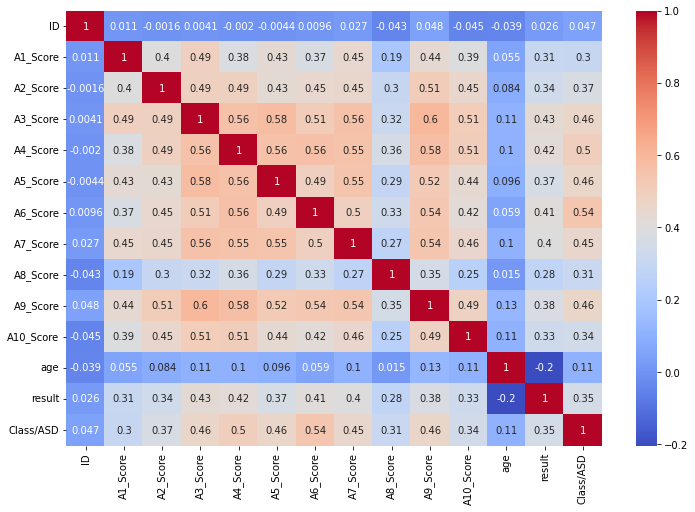

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(df_train.corr(), annot= True, cmap='coolwarm')

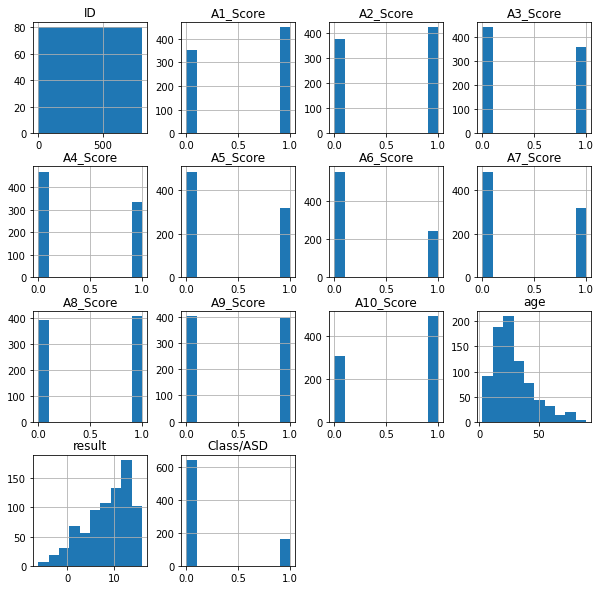

In [ ]:
df_train.hist(figsize=(10,10))
plt.show()

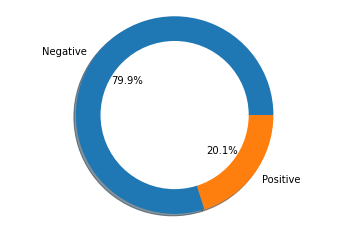

In [ ]:
plt.pie(df_train['Class/ASD'].value_counts(), labels=['Negative','Positive'], autopct='%1.1f%%', shadow=True)
        
centre_circle = plt.Circle((0,0),0.75,facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



plt.axis('equal')
plt.show()  

In [ ]:
df_train['gender'].value_counts()

m    530
f    270
Name: gender, dtype: int64

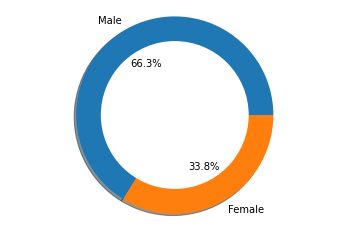

In [ ]:
plt.pie(df_train['gender'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%', shadow=True)
        
centre_circle = plt.Circle((0,0),0.75,facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



plt.axis('equal')
plt.show()  

In [ ]:
df_sort =df_train.sort_values(by=['age'], ascending=False).reset_index(drop=True)

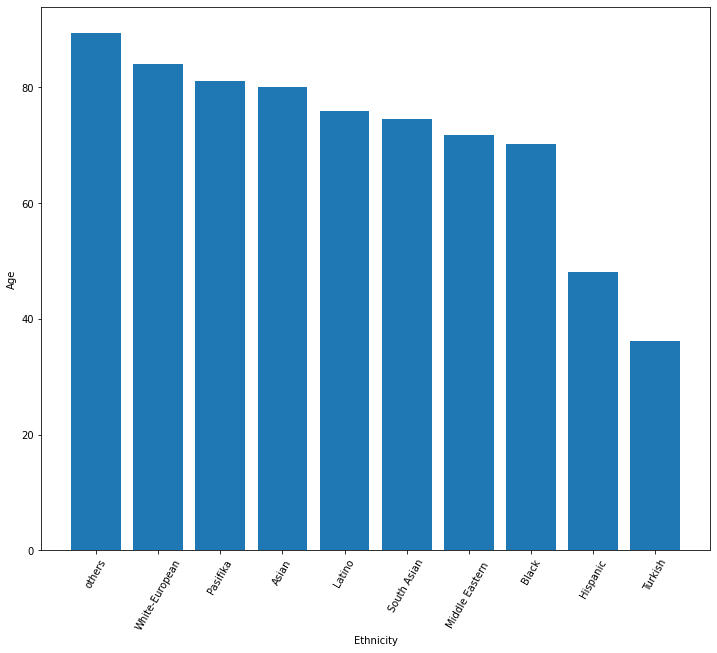

In [ ]:
fig, ax=plt.subplots(figsize=(12,10))
ax.bar(df_sort['ethnicity'],df_sort['age'])
ax.xaxis.set_tick_params(rotation=60)
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Age')

plt.show()

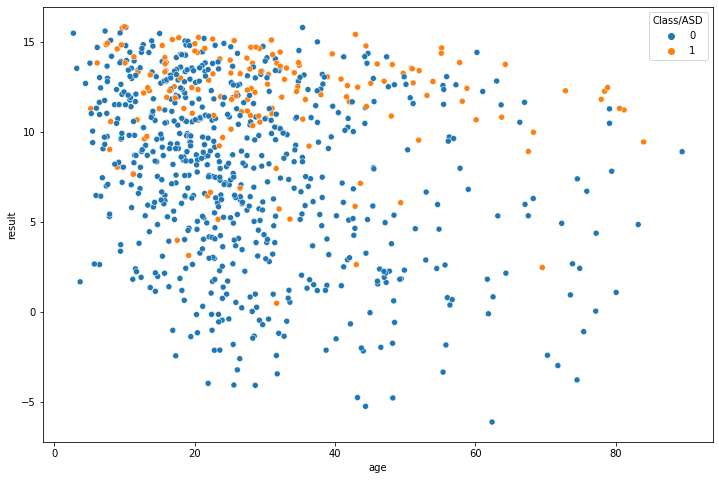

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='result', data=df_train, hue='Class/ASD')

In [ ]:
px.scatter(data_frame = df_train, x = 'age', y = 'result', symbol = 'Class/ASD', color = 'gender')

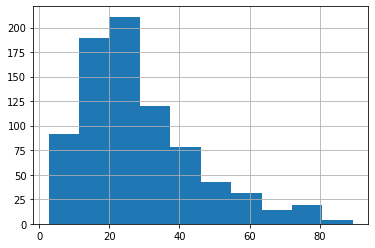

In [ ]:
df_train['age'].hist()

# **Outlier analysis using boxplot**

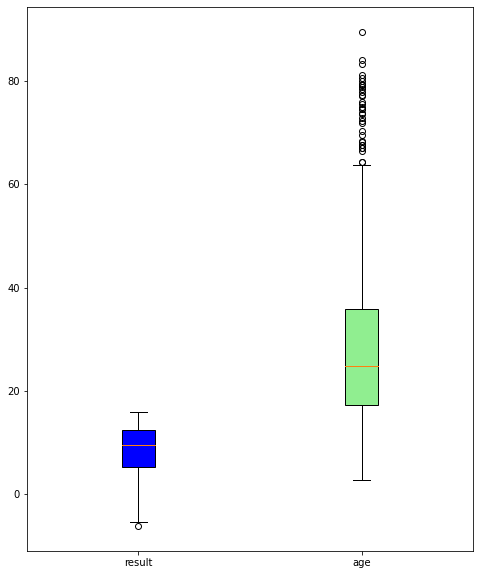

In [ ]:
fig, ax=plt.subplots(figsize=(8,10))

box=ax.boxplot([df_train['result'].dropna(),
                df_train['age'].dropna()],
               patch_artist=True)

ax.set_xticklabels(['result', 'age'])

colors=['blue', 'lightgreen']

for patch, color in zip(box['boxes'], colors):
  patch.set_facecolor(color)


plt.show()

# **Checking for outliers for variables**

In [ ]:
df_train.quantile([0.01,0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
0.01,8.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.469100,-3.461976,0.0
0.05,40.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.146961,-0.475406,0.0
0.25,200.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.198153,5.306575,0.0
0.50,400.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.848350,9.605299,0.0
0.75,600.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.865429,12.514484,0.0
0.95,760.05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,62.389204,14.649174,1.0
0.99,792.01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,79.111039,15.426351,1.0


#**First step with model**

In [ ]:
new1 = df_train['Class/ASD']
new2 = df_train['result']
new3= df_train['gender']
new4 = df_train['jaundice']
new5 = df_train['austim']
new6= df_train['ethnicity']

df_train_correct = pd.concat([new2,new1,new3,new4,new5,new6], axis=1)
df_train_correct

,result,Class/ASD,gender,jaundice,austim,ethnicity
0,6.351166,0,f,no,no,others
1,2.255185,0,m,no,no,others
2,14.851484,1,m,no,yes,White-European
3,2.276617,0,f,no,no,others
4,-4.777286,0,m,no,no,others
...,...,...,...,...,...,...
795,12.999501,0,m,no,no,Hispanic
796,13.561518,0,m,no,no,White-European
797,2.653177,0,m,yes,no,South Asian
798,9.069342,0,f,no,no,others


In [ ]:
X = df_train_correct.copy()

In [ ]:
X.drop(columns = 'Class/ASD', inplace = True)

In [ ]:
X

,result,gender,jaundice,austim,ethnicity
0,6.351166,f,no,no,others
1,2.255185,m,no,no,others
2,14.851484,m,no,yes,White-European
3,2.276617,f,no,no,others
4,-4.777286,m,no,no,others
...,...,...,...,...,...
795,12.999501,m,no,no,Hispanic
796,13.561518,m,no,no,White-European
797,2.653177,m,yes,no,South Asian
798,9.069342,f,no,no,others


In [ ]:
y = df_train['Class/ASD']

In [ ]:
y

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64

In [ ]:
cols_numerical = ['result']

In [ ]:
cols_numerical

['result']

In [ ]:
cols_categorical =['ethnicity','gender','jaundice','austim']

In [ ]:
cols_categorical 

['ethnicity', 'gender', 'jaundice', 'austim']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state = 333, stratify=y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23, stratify=y_temp)

In [ ]:
y.sum()/y.count()

0.20125

In [ ]:
y_train.sum()/y_train.count() 

0.20208333333333334

In [ ]:
y_test.sum()/y_test.count()

0.2

In [ ]:
y_val.sum()/y_val.count()

0.2

# **Pipeline and finish task with model**

In [ ]:
def count_boundary(col):
  
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1
  
  low_boundary = q1 - 1.5 * iqr
  upper_boundary = q3 + 1.5 * iqr

  return low_boundary, upper_boundary

In [ ]:
lb, ub = count_boundary(X_train['result'])
lb, ub

(-5.407164730625, 23.426138278375)

In [ ]:
class DetectOutliersTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):

    self.resultlb, self.resultub = count_boundary(X['result'])
    self.resultmean = X['result'].mean()

    return self

  def transform(self, X):
    X[(X['result']> self.resultub) | (X['result']< self.resultlb)]['result'] = self.resultmean

    return X

In [ ]:
transformer_numerical = Pipeline(steps = [
    ('outlier', DetectOutliersTransformer()),
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('discretizer', None), 
    ('scaler', StandardScaler())
])

In [ ]:
transformer_categorical = Pipeline(steps = [
    ('onehotenc', OneHotEncoder()),
    ('imputer', SimpleImputer(strategy = 'most_frequent'))
]) 

In [ ]:
preprocessor = ColumnTransformer(transformers =[
    ('numerical', transformer_numerical, cols_numerical),
    ('categorical', transformer_categorical, cols_categorical),
])

In [ ]:
pipe = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(random_state=0))
    ])

In [ ]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   DetectOutliersTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('discretizer',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotenc',
                                     

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   DetectOutliersTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('discretizer',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['result']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotenc',
                                     

In [ ]:
y_pred_train = pipe.predict(X_train)

In [ ]:
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

##Metrics

*  Metrics on the training set

In [ ]:
sklearn.metrics.confusion_matrix(y_train, y_pred_train)

array([[356,  27],
       [ 65,  32]])

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8083333333333333

In [ ]:
sklearn.metrics.recall_score(y_train, y_pred_train)

0.32989690721649484

In [ ]:
sklearn.metrics.precision_score(y_train, y_pred_train)

0.5423728813559322

In [ ]:
sklearn.metrics.f1_score(y_train, y_pred_train)

0.4102564102564102

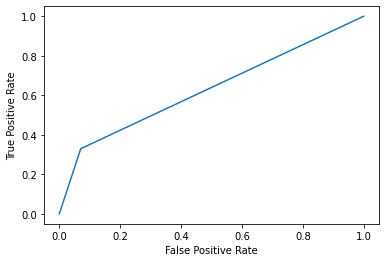

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_pred_train, pos_label=pipe.classes_[1]) 
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [ ]:
sklearn.metrics.roc_auc_score(y_train, y_pred_train)

0.6297004118327905

*  Metrics on the validation set

Valid
confusion_matrix:  [[121   7]
 [ 20  12]]
accuracy:  0.83125
recall:  0.375
precision:  0.631578947368421
f1:  0.47058823529411764
roc auc:  0.66015625


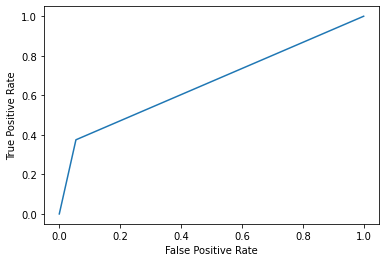

In [ ]:
y_pred_val = pipe.predict(X_val)
print('Valid')
print('confusion_matrix: ', confusion_matrix(y_val, y_pred_val))
print('accuracy: ', accuracy_score(y_val, y_pred_val))
print('recall: ', recall_score(y_val, y_pred_val))
print('precision: ', precision_score(y_val, y_pred_val))
print('f1: ', f1_score(y_val, y_pred_val))
print('roc auc: ', roc_auc_score(y_val, y_pred_val))
fpr, tpr, _ = roc_curve(y_val, y_pred_val, pos_label=pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

* Returned to prepear model and pipeline

In [ ]:
penalty = ['none', 'l1', 'elasticnet']

In [ ]:
one_pipe = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(random_state=0))
    ])

In [ ]:
models_df = pd.DataFrame() # table for saving metrics
for pen in penalty: #for each model

  if pen == 'l1':
    pipe_params = {
        'model__solver': 'liblinear',
        'model__penalty': 'l1'
    }
  elif pen == 'elasticnet':
    pipe_params = {
        'model__solver': 'saga',
        'model__l1_ratio': 0.1,
        'model__penalty': 'elasticnet'
    }
  else:
    pipe_params = {
        'model__random_state': 0,
        'model__solver': 'lbfgs',
        'model__penalty': 'l2'       
    }


  one_pipe.set_params(**pipe_params)

  start_time = time.time() 
  one_pipe.fit(X_train, y_train)
  end_time = time.time()

   
  y_pred_train = one_pipe.predict(X_train) 
  y_pred_val = one_pipe.predict(X_val)

  acc_train = accuracy_score(y_train, y_pred_train)
  acc_val = accuracy_score(y_val, y_pred_val)

  rec_train = recall_score(y_train, y_pred_train)
  rec_val = recall_score(y_val, y_pred_val)

  prec_train = precision_score(y_train, y_pred_train)
  prec_val = precision_score(y_val, y_pred_val)
  
  f1_train = f1_score(y_train, y_pred_train)
  f1_val = f1_score(y_val, y_pred_val)

  roc_auc_train = roc_auc_score(y_train, y_pred_train)
  roc_auc_val  = roc_auc_score(y_val, y_pred_val)

  param_dict = {
      'model__solver': one_pipe.get_params()['model__solver'],
      'model__l1_ratio': one_pipe.get_params()['model__l1_ratio'],
      'model__penalty':  one_pipe.get_params()['model__penalty'],
      'acc_train': acc_train,
      'acc_val':acc_val,
      'rec_train':rec_train,
      'rec_val': rec_val,
      'prec_train': prec_train,
      'prec_val':prec_val, 
      'f1_train':f1_train, 
      'f1_val':f1_val,
      'roc_auc_train':roc_auc_train, 
      'roc_auc_val':roc_auc_val
  }
  
  models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
models_df.reset_index(drop = True, inplace=True)

In [ ]:
models_df

,model__solver,model__l1_ratio,model__penalty,acc_train,acc_val,rec_train,rec_val,prec_train,prec_val,f1_train,f1_val,roc_auc_train,roc_auc_val
0,lbfgs,NaN,l2,0.808333,0.83125,0.329897,0.375,0.542373,0.631579,0.410256,0.470588,0.629700,0.660156
1,liblinear,NaN,l1,0.810417,0.83750,0.329897,0.375,0.551724,0.666667,0.412903,0.480000,0.631006,0.664062
2,saga,0.1,elasticnet,0.806250,0.83125,0.329897,0.375,0.533333,0.631579,0.407643,0.470588,0.628395,0.660156


In [ ]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [ ]:
models = [DummyClassifier(strategy = 'most_frequent'),
          LogisticRegression(random_state = 0),
          SVC(random_state = 0),
          KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree'),
          # GaussianNB(),
          # MultinomialNB(alpha=1.0),
          # ComplementNB(alpha=1.0),
          BernoulliNB(alpha=1.0),
          # CategoricalNB(alpha=1.0),
          DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf = 5, min_samples_split=7, criterion='gini'),
          RandomForestClassifier(n_estimators=75, criterion='entropy'),
          RandomForestClassifier(n_estimators=1, criterion='gini', min_samples_split=5, max_samples=20),
          # VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard'),
          AdaBoostClassifier(n_estimators=100, random_state=0),
          AdaBoostClassifier(n_estimators=75, learning_rate=1.0, random_state=0),
          # AdaBoostClassifier(n_estimators = 77, random_state= 1),
          # AdaBoostClassifier(learning_rate=0.5, algorithm='SAMME', random_state= 1),
          # AdaBoostClassifier(learning_rate=0.5, algorithm='SAMME', random_state= 1),
          RandomForestClassifier(max_depth=10, max_features=4,random_state=0)
                ]

In [ ]:
discretizers = [None, KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')]

In [ ]:
pipe_for_models = Pipeline( steps = [
    ('preprocessor', preprocessor),
    ('model',  None)
    ])

In [ ]:
models_df = pd.DataFrame() 
for model in models: 
  for discretizer in discretizers:
    model_name =  type(pipe_for_models.get_params()['model']).__name__
    if model_name =='ComplementNB':  
      pipe_params = {   
          'model': model,
          'preprocessor__numerical__discretizer':discretizer,
          'preprocessor__numerical__scaler':None
      }
    elif model_name == 'DecisionTreeClassifier':
            pipe_params = {
                'model': model,
                'preprocessor__numerical__discretizer': discretizer,
                'preprocessor__numerical__scaler': None
            }
    else:
        pipe_params = {   
            'model': model,
            'preprocessor__numerical__discretizer': discretizer
        }

    

    pipe_for_models.set_params(**pipe_params)

    start_time = time.time() 
    pipe_for_models.fit(X_train, y_train)
    end_time = time.time()

    
    y_pred_train = pipe_for_models.predict(X_train) 
    y_pred_val = pipe_for_models.predict(X_val)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)

    rec_train = recall_score(y_train, y_pred_train)
    rec_val = recall_score(y_val, y_pred_val)

    prec_train = precision_score(y_train, y_pred_train)
    prec_val = precision_score(y_val, y_pred_val)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_val = f1_score(y_val, y_pred_val)

    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_val  = roc_auc_score(y_val, y_pred_val)

    param_dict = {
        'model': str(pipe_for_models.get_params()['model']),
        'discretizer': str(pipe_for_models.get_params()['preprocessor__numerical__discretizer']),
        'acc_train': acc_train,
        'acc_val':acc_val,
        'rec_train':rec_train,
        'rec_val': rec_val,
        'prec_train': prec_train,
        'prec_val':prec_val, 
        'f1_train':f1_train, 
        'f1_val':f1_val,
        'roc_auc_train':roc_auc_train, 
        'roc_auc_val':roc_auc_val
    }
 
    print(param_dict)
    models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))

In [ ]:
models_df.reset_index(drop = True, inplace=True)

In [ ]:
models_df.sort_values('f1_val', ascending=False)

,model,discretizer,acc_train,acc_val,rec_train,rec_val,prec_train,prec_val,f1_train,f1_val,roc_auc_train,roc_auc_val
6,KNeighborsClassifier(algorithm='ball_tree'),None,0.864583,0.83125,0.556701,0.46875,0.710526,0.600000,0.624277,0.526316,0.749630,0.695312
8,BernoulliNB(),None,0.808333,0.82500,0.577320,0.46875,0.523364,0.576923,0.549020,0.517241,0.722080,0.691406
9,BernoulliNB(),"KBinsDiscretizer(encode='ordinal', n_bins=10, ...",0.806250,0.82500,0.577320,0.46875,0.518519,0.576923,0.546341,0.517241,0.720775,0.691406
15,"RandomForestClassifier(max_samples=20, min_sam...","KBinsDiscretizer(encode='ordinal', n_bins=10, ...",0.812500,0.85625,0.329897,0.34375,0.561404,0.846154,0.415584,0.488889,0.632311,0.664062
20,"RandomForestClassifier(max_depth=10, max_featu...",None,0.977083,0.82500,0.896907,0.40625,0.988636,0.590909,0.940541,0.481481,0.947148,0.667969
3,LogisticRegression(random_state=0),"KBinsDiscretizer(encode='ordinal', n_bins=10, ...",0.808333,0.83750,0.329897,0.37500,0.542373,0.666667,0.410256,0.480000,0.629700,0.664062
12,"RandomForestClassifier(criterion='entropy', n_...",None,0.997917,0.80625,0.989691,0.43750,1.000000,0.518519,0.994819,0.474576,0.994845,0.667969
2,LogisticRegression(random_state=0),None,0.806250,0.83125,0.329897,0.37500,0.533333,0.631579,0.407643,0.470588,0.628395,0.660156
16,"AdaBoostClassifier(n_estimators=100, random_st...",None,0.847917,0.80625,0.474227,0.40625,0.676471,0.520000,0.557576,0.456140,0.708393,0.656250
19,"AdaBoostClassifier(n_estimators=75, random_sta...","KBinsDiscretizer(encode='ordinal', n_bins=10, ...",0.808333,0.81875,0.340206,0.37500,0.540984,0.571429,0.417722,0.452830,0.633550,0.652344
